Import Libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Visualization - Displaying infected and uninfected cell images

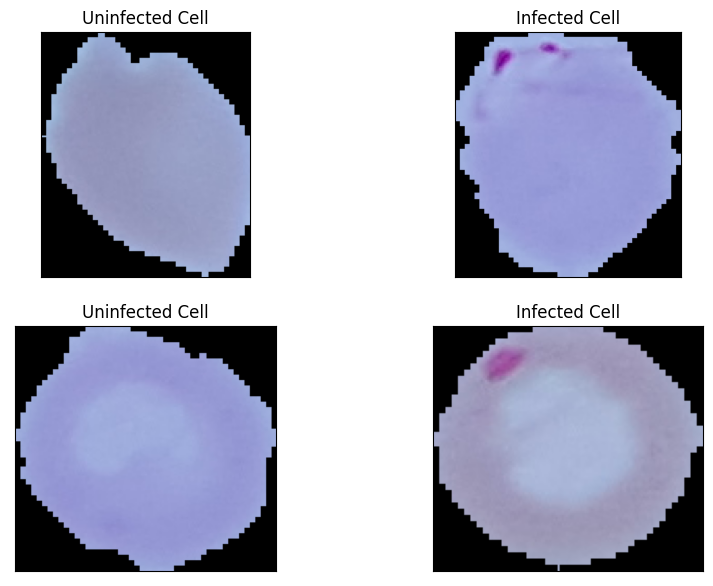

In [4]:
import cv2

p1= '../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C1_thinF_IMG_20150604_104919_cell_178.png'
p2='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
p3='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
p4='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105253_cell_106.png'

plt.figure(1, figsize = (10 , 7))
plt.subplot(2 , 2 , 1)
plt.imshow(cv2.imread(p1))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 2)
plt.imshow(cv2.imread(p3))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 3)
plt.imshow(cv2.imread(p2))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 4)
plt.imshow(cv2.imread(p4))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

Train-test split

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [6]:
width = 128
height = 128

trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


Model architecture

In [17]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)       

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
#early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [20]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =30,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen)
                             )
#callbacks=[early_stop]

Epoch 1/30


/tmp/ipykernel_30/3498885891.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,
2023-05-20 22:35:52.792133: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


689/689 [==============================] - 48s 67ms/step - loss: 0.4521 - accuracy: 0.7744 - val_loss: 0.1899 - val_accuracy: 0.9314
Epoch 2/30
689/689 [==============================] - 46s 67ms/step - loss: 0.1816 - accuracy: 0.9366 - val_loss: 0.1680 - val_accuracy: 0.9396
Epoch 3/30
689/689 [==============================] - 46s 67ms/step - loss: 0.1448 - accuracy: 0.9542 - val_loss: 0.1841 - val_accuracy: 0.9414
Epoch 4/30
689/689 [==============================] - 46s 67ms/step - loss: 0.1230 - accuracy: 0.9612 - val_loss: 0.1753 - val_accuracy: 0.9485
Epoch 5/30
689/689 [==============================] - 48s 69ms/step - loss: 0.1095 - accuracy: 0.9635 - val_loss: 0.1756 - val_accuracy: 0.9470
Epoch 6/30
689/689 [==============================] - 46s 67ms/step - loss: 0.1015 - accuracy: 0.9671 - val_loss: 0.1598 - val_accuracy: 0.9470
Epoch 7/30
689/689 [==============================] - 46s 67ms/step - loss: 0.0860 - accuracy: 0.9708 - val_loss: 0.1863 - val_accuracy: 0.9463
Epo

In [23]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

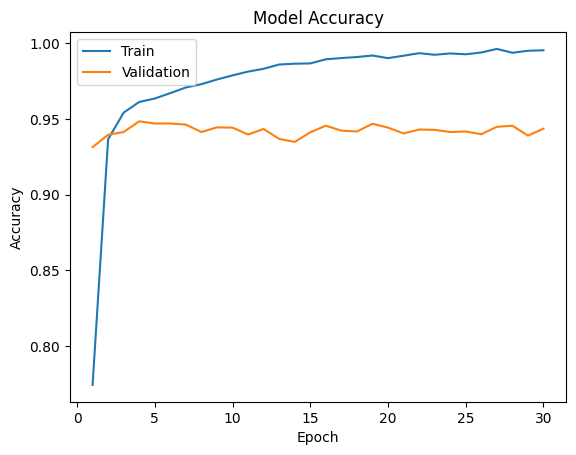

In [24]:
plotLearningCurve(history,30)